<a href="https://colab.research.google.com/github/Jmi205/ISIS3301-Proyecto1Et1/blob/main/Proyecto1_Et1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1 - Etapa 1 | Inteligencía de Negocios**

Analitica de textos





## Integrantes

*   Juan Miguel Delgado - 202314903
*   Rodrigo Garcia -
*   Daniel Gomez -


## Métodologia para proyecto
Para el análisis de texto en este proyecto se utilizará el método **TF-IDF (Term Frequency – Inverse Document Frequency)**.  
Este enfoque permite representar los textos como vectores numéricos que reflejan la importancia de cada término en un documento en relación con la colección completa de documentos. De esta forma, se destacan las palabras más representativas de cada texto y se reducen aquellas que aparecen de manera muy frecuente y no aportan valor para la clasificación.

Se implementarán tres algoritmos de clasificación:

- **K-Nearest Neighbors (KNN)**  
- **Decision Tree**  
- **Logistic Regression**  


Para cada uno de estos algoritmos se trabajara la siguiente métodlogia:


*   **KFold**
*   **GridSearch**
*   **Creación modelo**
*   **Análitica del modelo y métricas**



# Instalación de dependencias y librerias
Haremos la instalación de la mayoria de paquetes, librerias y dependencias necesarias para poder ejecutar nuestro proyecto

In [ ]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect

# Manejo de gráficas
!pip install scikit-plot

!pip install openpyxl

!pip install num2words

# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
from nltk.corpus import stopwords


# Punkt permite separar un texto en frases.
nltk.download('punkt')

nltk.download('punkt_tab')

# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?
nltk.download('stopwords')

# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=6a27c5dcbae194d200c21c20616a14bd843d35ec0afc25c3317ea01cac63f8b7
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nltk spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 88.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats as st

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

from num2words import num2words

import spacy

from nltk.stem import SnowballStemmer

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [ ]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

from sklearn import tree

import string

from collections import Counter


# Importación de datos
Importaremos los datos para nuestro proyecto y preparemos el data set para poder trabajar con el.



## Estructura del DT

El data set tiene dos columnas:


*   textos - Opinion para plasificar el ODS
*   labels - ODS

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data = pd.read_excel("Datos_proyecto.xlsx")

data_t=data

# Entenidimiento de los datos

Vamos a revisar nustro dataset y revisar que cosas podemos concluir sobre su estructura.

In [ ]:
data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


In [ ]:
data_t.shape

(2424, 2)

## Distribución de los labels
Utilizaremos un grafico de barras para representar como es la distribución de los datos y sus labels en el set que estamos manejando. Un punto importante para entender la distribución de los datos.

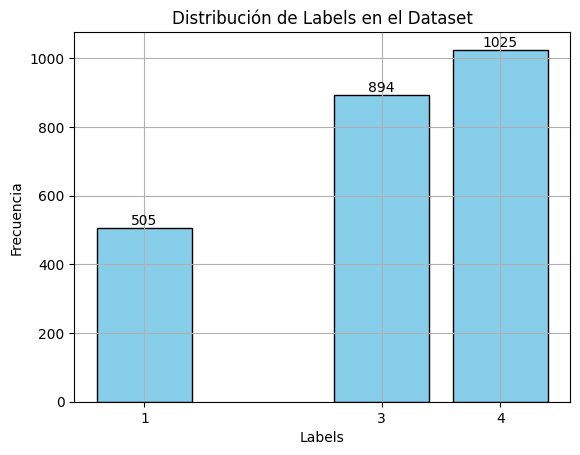

In [ ]:
# Creación data set para graficación
label_counts = data_t['labels'].value_counts().sort_index()

# Graficar
bars = plt.bar(label_counts.index, label_counts.values, color="skyblue", edgecolor="black")

# Ajustar los ticks del eje X
plt.xticks([1, 3, 4])

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05,
             str(int(height)), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Labels")
plt.ylabel("Frecuencia")
plt.title("Distribución de Labels en el Dataset")

plt.grid()
plt.show()

In [ ]:
# Se observa que no hay ausencias
data_t.isnull().sum()

,0
textos,0
labels,0


In [ ]:
data_t['textos'].dropna()

,textos
0,"""Aprendizaje"" y ""educación"" se consideran sinó..."
1,Para los niños más pequeños (bebés y niños peq...
2,"Además, la formación de especialistas en medic..."
3,En los países de la OCDE se tiende a pasar de ...
4,Este grupo se centró en las personas que padec...
...,...
2419,La tutoría de carrera está diseñada para apoya...
2420,Fuente: Ministerio de Educación. Las Tasas Int...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu..."
2422,"Sin embargo, estas fallas del mercado implican..."


## Análisis de columna "textos"

Vamos a hacer un análisis de la columna texto, revisaremos longitud de las cadenas, minimos, maximos y más detalles que nos guien como proceder con la preparación de los datos.

In [ ]:
textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

textos

,textos,labels,Conteo,Max,Min
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1
2,"Además, la formación de especialistas en medic...",3,659,15,1
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1
4,Este grupo se centró en las personas que padec...,3,608,14,0
...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1


### Análisis basico de Corpus del texto

Graficaremos algunos datos releventes sobre longitudes de caracteres y palabras.


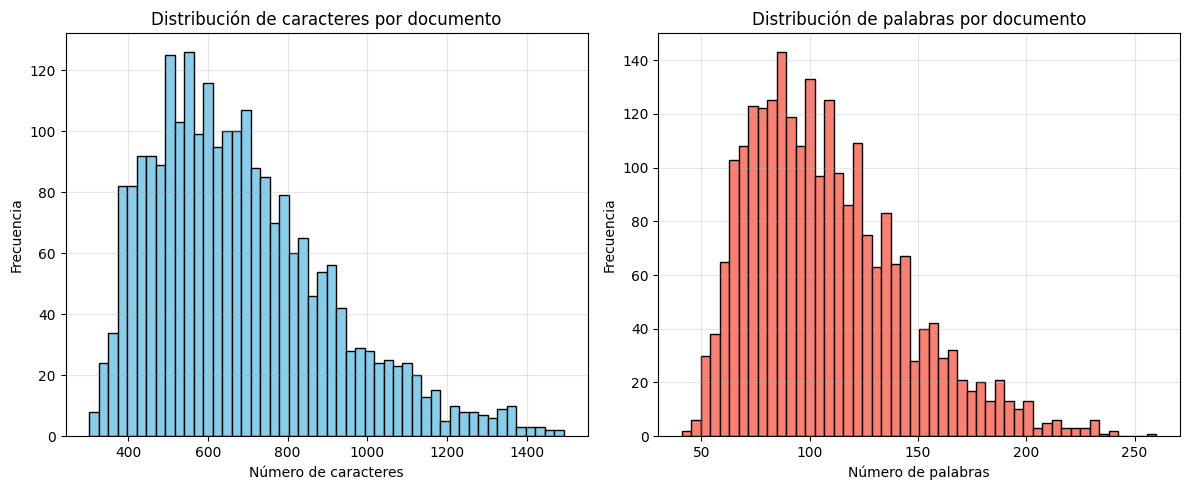

In [ ]:
data['num_chars'] = data_t['textos'].apply(len)
data['num_words'] = data_t['textos'].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de caracteres
ax[0].hist(data['num_chars'], bins=50, color="skyblue", edgecolor="black")
ax[0].set_title("Distribución de caracteres por documento")
ax[0].set_xlabel("Número de caracteres")
ax[0].set_ylabel("Frecuencia")
ax[0].grid(alpha=0.3)

# Histograma de palabras
ax[1].hist(data['num_words'], bins=50, color="salmon", edgecolor="black")
ax[1].set_title("Distribución de palabras por documento")
ax[1].set_xlabel("Número de palabras")
ax[1].set_ylabel("Frecuencia")
ax[1].grid(alpha=0.3)

# Ajustar el espacio y mostrar
plt.tight_layout()
plt.show()


### Conteo de caracteres ASCII vs no ASCII

Revisaremos los caracteres especiales en nuestro documento

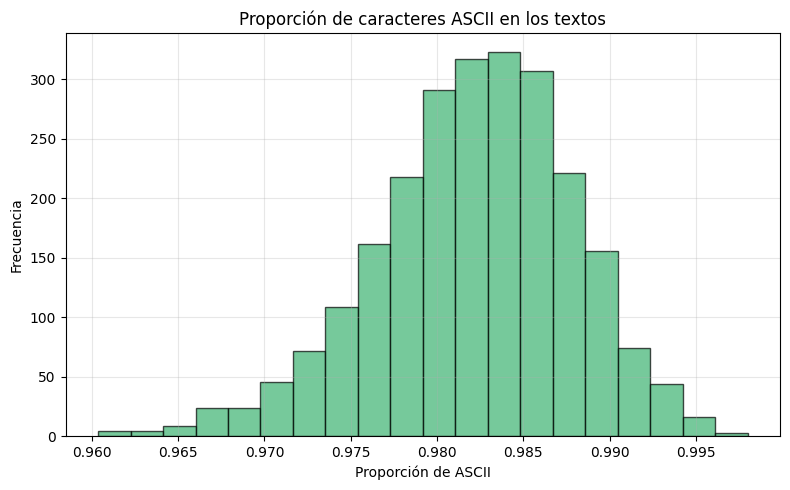

In [ ]:
# Función de apoyo
def ascii_ratio(text):
    total = len(text)
    ascii_count = sum(1 for c in text if c in string.printable)
    return ascii_count / total if total > 0 else 0

# Nueva columna calculada
data['ascii_ratio'] = data_t['textos'].apply(ascii_ratio)

# Histograma con estilo
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data['ascii_ratio'], bins=20, color="mediumseagreen", edgecolor="black", alpha=0.7)

# Configuración visual
ax.set_title("Proporción de caracteres ASCII en los textos")
ax.set_xlabel("Proporción de ASCII")
ax.set_ylabel("Frecuencia")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Palabras más frecuentes en el documento

Un histograma para obsevar la distribución de las 20 palabras más frecuentes

/tmp/ipython-input-2675459812.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=75, ha="right")


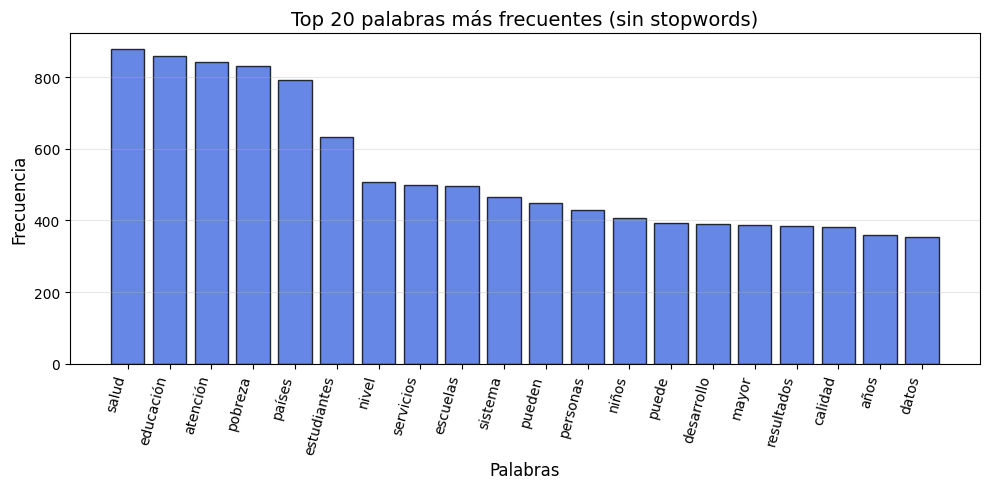

In [ ]:
# Conteo
all_words = []
for text in data_t['textos']:
    words = [w.lower() for w in text.split() if w.isalpha()]
    words = [w for w in words if w not in stop_words]
    all_words.extend(words)

counter = Counter(all_words).most_common(20)

# Separar palabras y frecuencias
words, counts = zip(*counter)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(words, counts, color="royalblue", edgecolor="black", alpha=0.8)

# Configuración visual
ax.set_title("Top 20 palabras más frecuentes (sin stopwords)", fontsize=14)
ax.set_ylabel("Frecuencia", fontsize=12)
ax.set_xlabel("Palabras", fontsize=12)
ax.set_xticklabels(words, rotation=75, ha="right")
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

### Proporción stopwords por documento

Por medío de este análisis podremos ver que tanto ***"ruido"*** hay en nuestro documento.



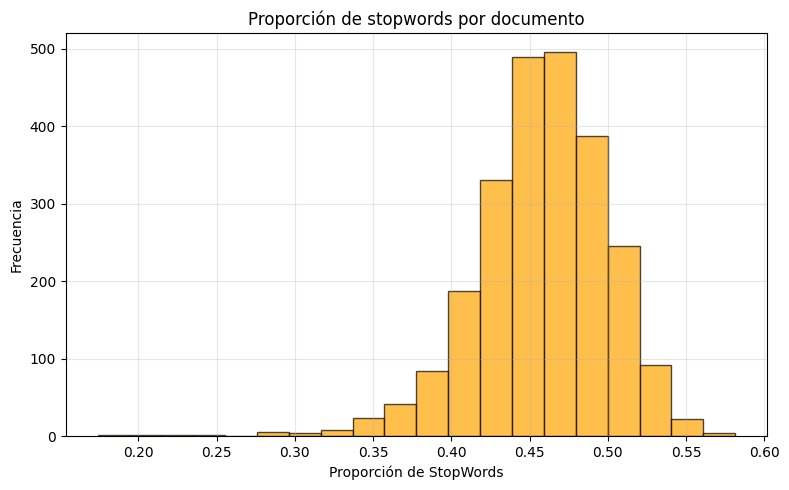

In [ ]:
data['stopword_ratio'] = data_t['textos'].apply(
    lambda x: sum(1 for w in x.split() if w.lower() in stop_words) / (len(x.split())+1)
)

# Histograma con estilo
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data['stopword_ratio'], bins=20, color="orange", edgecolor="black", alpha=0.7)

# Configuración visual
ax.set_title("Proporción de stopwords por documento")
ax.set_xlabel("Proporción de StopWords")
ax.set_ylabel("Frecuencia")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Preparación de datos

Dado el análisis realizado en el punto anterior, haremos una perparación de los datos, depurando el texto y arreglandolo para poder se análizado y estudiado por los algoritmos de clasificación

### Funciónes auxiliares preparación datos

Las siguientes opciones las usaremos para hacer un preprocessing del los documentos. En estas funciones:

* Removeremos caracteres non ascii
* Volveremos todo a lowecase
* Removeremos signos de puntuación
* Quitaremos stopwords de documentos

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        x = word.lower()
        new_words.append(x)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Reemplaza todos los números enteros en una lista de tokens por su representación en texto (español)"""
    new_words = []
    for word in words:
        if word.isdigit():  # si es un número
            new_word = num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    # words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización de documentos

Para poder hacer nustro preprocessing, necesitamso **tokenizar** los documetnos. Esto lo haremos en una nueva columna "words"

In [ ]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t

,textos,labels,num_chars,num_words,ascii_ratio,stopword_ratio,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,48,0.980114,0.448980,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,516,72,0.974806,0.410959,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,659,93,0.986343,0.382979,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,693,109,0.991342,0.463636,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,608,94,0.986842,0.431579,"[Este, grupo, se, centró, en, las, personas, q..."
...,...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,113,0.982456,0.464912,"[La, tutoría, de, carrera, está, diseñada, par..."
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,85,0.974122,0.488372,"[Fuente, :, Ministerio, de, Educación, ., Las,..."
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,64,0.985795,0.461538,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner..."
2422,"Sin embargo, estas fallas del mercado implican...",3,754,129,0.988064,0.538462,"[Sin, embargo, ,, estas, fallas, del, mercado,..."


In [ ]:
data_t['words'].dropna()
data_t.shape

(2424, 7)

### Aplicar preprocessing

Una vez tokenizados y removido los NA. Procedemos a aplicar nuestras funciones para eliminación del ruido

In [ ]:
data_t['wordsNew']=data_t['words'].apply(preprocessing)
data_t

,textos,labels,num_chars,num_words,ascii_ratio,stopword_ratio,words,wordsNew
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,48,0.980114,0.448980,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,516,72,0.974806,0.410959,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,659,93,0.986343,0.382979,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,693,109,0.991342,0.463636,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,608,94,0.986842,0.431579,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."
...,...,...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,113,0.982456,0.464912,"[La, tutoría, de, carrera, está, diseñada, par...","[tutoria, carrera, disenada, apoyar, estudiant..."
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,85,0.974122,0.488372,"[Fuente, :, Ministerio, de, Educación, ., Las,...","[fuente, ministerio, educacion, tasas, interna..."
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,64,0.985795,0.461538,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...","[2010, pnud, sido, pionero, puesta, marcha, pr..."
2422,"Sin embargo, estas fallas del mercado implican...",3,754,129,0.988064,0.538462,"[Sin, embargo, ,, estas, fallas, del, mercado,...","[embargo, fallas, mercado, implican, competenc..."


### **Lemmantización y stemwords**

Las siguientes funciones son para realizar algunos de estos modelos para en análisis de texto, en este caso decidimos quedarnos solo con lemmantización.

In [ ]:
# Modelo spaCy para español (ya descargado con: python -m spacy download es_core_news_sm)
nlp = spacy.load("es_core_news_sm")

# Stemmer en español
stemmer = SnowballStemmer("spanish")

def stem_words(words):
    """Aplicar stemming a lista de palabras ya tokenizadas"""
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Aplicar lematización a lista de palabras ya tokenizadas"""
    doc = nlp(" ".join(words))   # spaCy procesa el texto
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Primero stem, luego lematización (y se combinan)"""
    #stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return lemmas

data_t['wordsNew'] = data_t['wordsNew'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t

,textos,labels,num_chars,num_words,ascii_ratio,stopword_ratio,words,wordsNew
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,48,0.980114,0.448980,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, considerar, sinonimo,..."
1,Para los niños más pequeños (bebés y niños peq...,4,516,72,0.974806,0.410959,"[Para, los, niños, más, pequeños, (, bebés, y,...","[nino, mas, pequeno, beb, nino, pequeno, capac..."
2,"Además, la formación de especialistas en medic...",3,659,93,0.986343,0.382979,"[Además, ,, la, formación, de, especialistas, ...","[adema, formacion, especialista, medicín, gene..."
3,En los países de la OCDE se tiende a pasar de ...,4,693,109,0.991342,0.463636,"[En, los, países, de, la, OCDE, se, tiende, a,...","[país, ocde, tender, pasar, curso, obligatorio..."
4,Este grupo se centró en las personas que padec...,3,608,94,0.986842,0.431579,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, persona, padecer, trastorno, m..."
...,...,...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,113,0.982456,0.464912,"[La, tutoría, de, carrera, está, diseñada, par...","[tutorio, carrero, disenado, apoyar, estudiant..."
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,85,0.974122,0.488372,"[Fuente, :, Ministerio, de, Educación, ., Las,...","[fuente, ministerio, educacion, tasa, interno,..."
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,64,0.985795,0.461538,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...","[2010, pnud, ser, pionero, puesta, marcha, pre..."
2422,"Sin embargo, estas fallas del mercado implican...",3,754,129,0.988064,0.538462,"[Sin, embargo, ,, estas, fallas, del, mercado,...","[embargo, fal él, mercado, implicar, competenc..."


In [ ]:
data_t['wordsNew'] = data_t['wordsNew'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,num_chars,num_words,ascii_ratio,stopword_ratio,words,wordsNew
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,48,0.980114,0.448980,"[``, Aprendizaje, '', y, ``, educación, '', se...",aprendizaje educacion considerar sinonimo esco...
1,Para los niños más pequeños (bebés y niños peq...,4,516,72,0.974806,0.410959,"[Para, los, niños, más, pequeños, (, bebés, y,...",nino mas pequeno beb nino pequeno capacitacion...
2,"Además, la formación de especialistas en medic...",3,659,93,0.986343,0.382979,"[Además, ,, la, formación, de, especialistas, ...",adema formacion especialista medicín general t...
3,En los países de la OCDE se tiende a pasar de ...,4,693,109,0.991342,0.463636,"[En, los, países, de, la, OCDE, se, tiende, a,...",país ocde tender pasar curso obligatorio optat...
4,Este grupo se centró en las personas que padec...,3,608,94,0.986842,0.431579,"[Este, grupo, se, centró, en, las, personas, q...",grupo centro persona padecer trastorno mental ...
...,...,...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,113,0.982456,0.464912,"[La, tutoría, de, carrera, está, diseñada, par...",tutorio carrero disenado apoyar estudiante con...
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,85,0.974122,0.488372,"[Fuente, :, Ministerio, de, Educación, ., Las,...",fuente ministerio educacion tasa interno retor...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,64,0.985795,0.461538,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...",2010 pnud ser pionero puesta marcha presentaci...
2422,"Sin embargo, estas fallas del mercado implican...",3,754,129,0.988064,0.538462,"[Sin, embargo, ,, estas, fallas, del, mercado,...",embargo fal él mercado implicar competencia si...


### **Palabras más representativas por label**

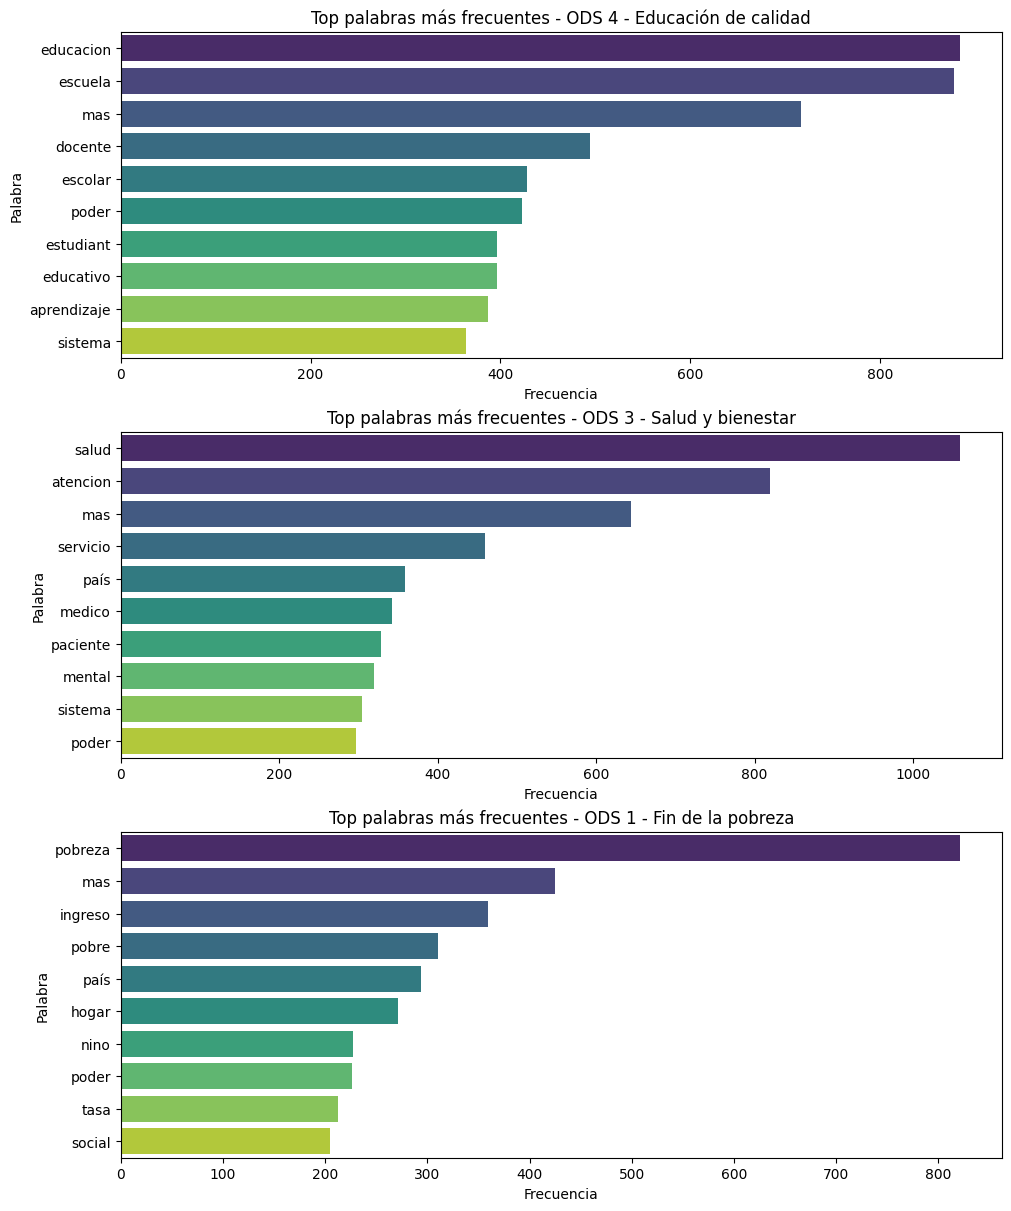

In [ ]:
# Diccionario con labels
dic_labels = {1: "Fin de la pobreza", 3:  "Salud y bienestar" , 4: "Educación de calidad"}

# Contar palabras por cada label
top_words = {}
for label in data_t["labels"].unique():

    textos = data_t[data_t["labels"] == label]["wordsNew"].str.cat(sep=" ")
    tokens = textos.lower().split()
    # Contar frecuencia
    counter = Counter(tokens)
    top_words[label] = counter.most_common(10)


# Crear suplot
fig, axes = plt.subplots(3, 1, figsize=(10, 12), constrained_layout=True)

# Iterar sobre cada clase y su gráfico correspondiente
for ax, (label, palabras) in zip(axes, top_words.items()):
    palabras_, freqs = zip(*palabras)

    sns.barplot(
        x=list(freqs),
        y=list(palabras_),
        palette="viridis",
        hue=list(palabras_),
        dodge=False,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Top palabras más frecuentes - ODS {label} - {dic_labels[label]}")
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel("Palabra")

plt.show()


### Tecnicas representación texto

Para el análisis de texto en este proyecto se utilizará el método **TF-IDF (Term Frequency – Inverse Document Frequency)**.  
Este enfoque permite representar los textos como vectores numéricos que reflejan la importancia de cada término en un documento en relación con la colección completa de documentos. De esta forma, se destacan las palabras más representativas de cada texto y se reducen aquellas que aparecen de manera muy frecuente y no aportan valor para la clasificación.

In [ ]:
# Separación datos X - Y para en análisis
X_data, y_data = data_t['wordsNew'],data_t['labels']


In [ ]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(2424, 11788)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(2424, 11788)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(X_data)

print(tf_idf.shape)
tf_idf.toarray()[0]

(2424, 11788)


array([0., 0., 0., ..., 0., 0., 0.])

### BOW de nuestra representación
La siguiente es la lista como estan representadas las palabras en la matrix tf_idf

In [ ]:
vocab = vectorizer.get_feature_names_out()
print("Vocabulario: ")
print(list(vocab))


Vocabulario: 
['000', '005', '008', '01', '015', '02', '020', '029', '03', '030', '04', '04062014', '043', '048', '04s', '05', '059', '06', '061', '065', '07', '070', '071', '076', '07813', '08', '0831', '08607', '09', '09212', '093', '095', '096', '097', '0servicios', '10', '100', '1000', '10000', '100000', '101', '1020', '1025', '103', '1035', '104', '105', '106', '108', '109', '10o', '11', '110', '1100', '11000', '111', '1112', '112', '113', '114', '1149', '115', '11511', '1154', '116', '1166', '117', '118', '12', '120', '1200', '121', '122', '1229', '123', '1230', '124', '125', '126', '127', '128', '1280', '128159', '1282', '12d', '12o', '13', '130', '1314', '132', '133', '134', '135', '137', '138', '139', '13961406', '14', '140', '1400', '1415', '142', '143', '144', '145', '146', '147', '149', '15', '150', '1500', '151', '1516', '152', '1524', '154', '155', '15561564', '156', '157', '158', '1581', '159', '16', '160', '1600', '161', '1618', '165', '1658', '168', '169', '17', '171',

## **Modelado y evaluación**

En esta sección utilizaremos el siguiente path para cada uno de los modelos implementados.

### **Modelos de Clasificación**

Se implementarán tres algoritmos de clasificación:

- **K-Nearest Neighbors (KNN)**  
- **Decision Tree**  
- **Logistic Regression**  

Cada uno de estos modelos se evaluará con las siguientes técnicas:

### **K-Fold Cross Validation**
Se aplicará un esquema de validación cruzada **K-Fold**, el cual consiste en dividir el conjunto de datos en *K* subconjuntos (o "folds").  

### **Grid Search**
Se usará la técnica de **Grid Search** para realizar la búsqueda exhaustiva de combinaciones de hiperparámetros en cada modelo.  

### **Entrenamiento Final y Evaluación**

Una vez encontrados los **mejores hiperparámetros** mediante Grid Search y validados con K-Fold, se entrenará el modelo optimizado con todo el conjunto de datos.  
Sobre este modelo final se realizará un análisis de resultados y métricas, tales como:
- Precisión (Accuracy)  
- Recall (Sensibilidad)  
- F1-Score  
- Matriz de confusión  

Este análisis permitirá interpretar el desempeño de cada modelo y determinar cuál se ajusta mejor al problema planteado.


### División datos y preparación K-Fold

In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    tf_idf, y_data, test_size=0.2, stratify=y_data, random_state=42
)
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

### **KNN Algorithm**
Buscaremos cuaales son los mejores hiperparametros para nuestro modelo, luego lo entrenaremos y revisaremos los resultados.

#### **KNN Hiperparametros**

Buscamos cuale es la mejor cantidad de:

* n_neighbors
* weights
* metric
* algorithm

In [ ]:
params = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "cosine"],
    "algorithm": ['auto', 'brute']
}


knn = KNeighborsClassifier()
mejor_modelo_knn = GridSearchCV(knn, params, cv=particiones, scoring="f1_macro")
mejor_modelo_knn.fit(X_train, y_train)

print("Mejores hiperparámetros:", mejor_modelo_knn.best_params_)
print("Mejor F1 (macro):", mejor_modelo_knn.best_score_)


Mejores hiperparámetros: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Mejor F1 (macro): 0.9596634994216384


#### **Entrenamiendo modelo con Hiperparametros**

Teniendo en cuenta los resultado obtenido por el searchGrid, los utilizamos para obtener la mejor vesión de nuestro modelo KNN

In [ ]:
# Entrenar un KNN con los mejores hiperparámetros
best_params = mejor_modelo_knn.best_params_

knn = KNeighborsClassifier(
    n_neighbors=best_params["n_neighbors"],
    weights=best_params["weights"],
    metric=best_params["metric"],
    algorithm=best_params["algorithm"]
)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.954639175257732

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.93      0.94      0.94       101
           3       0.96      0.95      0.95       179
           4       0.97      0.97      0.97       205

    accuracy                           0.95       485
   macro avg       0.95      0.95      0.95       485
weighted avg       0.95      0.95      0.95       485



#### **Matriz Confusión KNN**


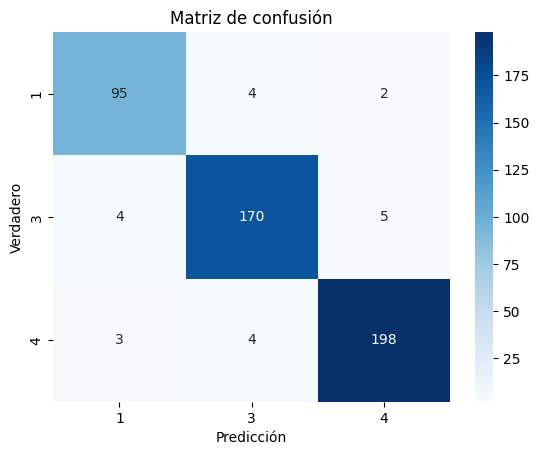

In [ ]:
# Matriz de confusión - KNN
cm = confusion_matrix(y_test, y_pred_knn, labels=[1,3,4])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,3,4], yticklabels=[1,3,4])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

### **Decision Tree Algorithm**
Buscaremos cuaales son los mejores hiperparametros para nuestro modelo, luego lo entrenaremos y revisaremos los resultados.

#### **Decision Tree Hiperparametros**

Buscaremos el mejor modelo, testeando los siguientes parametros:
* criterion
* max_depth
* min_samples_split
* min_samples_leaf

In [ ]:

# Decision Tree
params_dt = {
    "criterion": ["gini", "entropy"],   # función para medir la pureza
    "max_depth": [None, 10, 20, 30],    # profundidad máxima
    "min_samples_split": [2, 5, 10],    # nodos mínimos para dividir
    "min_samples_leaf": [1, 2, 5]       # nodos mínimos en hojas
}

dt = DecisionTreeClassifier(random_state=0)
mejor_dt = GridSearchCV(dt, params_dt, cv=particiones, scoring="f1_macro")
mejor_dt.fit(X_train, y_train)

print("\n--- Decision Tree ---")
print("Mejores hiperparámetros:", mejor_dt.best_params_)
print("Mejor F1 (macro):", mejor_dt.best_score_)




--- Decision Tree ---
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 (macro): 0.9283053461249933


#### **Entrenamiento modelo con Hiperparametros**

In [ ]:
# Reentrenar con los mejores hiperparámetros
best_params_dt = mejor_dt.best_params_
dt = DecisionTreeClassifier(**best_params_dt, random_state=0)
dt.fit(X_train, y_train)

# Evaluación
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Reporte:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.8948453608247423
Reporte:
               precision    recall  f1-score   support

           1       0.86      0.81      0.84       101
           3       0.86      0.90      0.88       179
           4       0.94      0.93      0.94       205

    accuracy                           0.89       485
   macro avg       0.89      0.88      0.88       485
weighted avg       0.90      0.89      0.89       485



#### **Matriz confusión DCT**

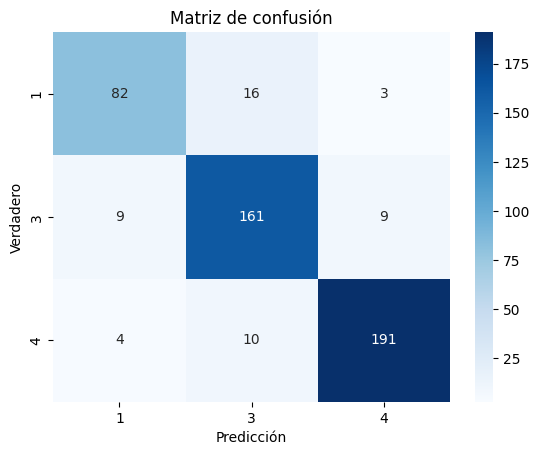

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt, labels=[1,3,4])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,3,4], yticklabels=[1,3,4])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

### **Logistic Regression Algorithm**

#### **Logistic Regression Hiperparametros**

Buscaremos el mejor modelo, testeando los siguientes parametros:

* C
* penalty
* solver
* max_iter

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {
    "C": [0.01, 0.1, 1, 10],          # fuerza de regularización
    "penalty": ["l2"],                # tipo de regularización (l1 no siempre funciona con tfidf sparse)
    "solver": ["lbfgs", "saga"],      # algoritmos de optimización
    "max_iter": [1000]                # más iteraciones para asegurar convergencia
}

particiones = KFold(n_splits=10, shuffle=True, random_state=0)

lr = LogisticRegression()
mejor_lr = GridSearchCV(lr, params_lr, cv=particiones, scoring="f1_macro")
mejor_lr.fit(X_train, y_train)

print("\n--- Logistic Regression ---")
print("Mejores hiperparámetros:", mejor_lr.best_params_)
print("Mejor F1 (macro):", mejor_lr.best_score_)




--- Logistic Regression ---
Mejores hiperparámetros: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Mejor F1 (macro): 0.9709590533541588


#### **Entrenamiento modelo con Hiperparametros**

In [ ]:
# Reentrenar con los mejores hiperparámetros
best_params_lr = mejor_lr.best_params_
lr = LogisticRegression(**best_params_lr)
lr.fit(X_train, y_train)

# Evaluación
y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Reporte:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9670103092783505
Reporte:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94       101
           3       0.96      0.97      0.96       179
           4       0.98      0.98      0.98       205

    accuracy                           0.97       485
   macro avg       0.97      0.96      0.96       485
weighted avg       0.97      0.97      0.97       485



#### **Matriz Confusión LR**

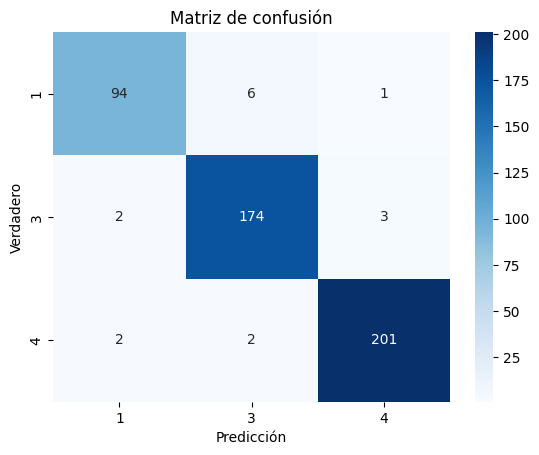

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr, labels=[1,3,4])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,3,4], yticklabels=[1,3,4])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de confusión")
plt.show()

## **Resultados**

### **Descripción resultados obtenidos**

### **Análisis palabras identificadas**


ODS 1 - Top 10 palabras influyentes
pobreza         -> 10.1584
pobre           -> 5.8011
pobrezar        -> 4.8137
hogar           -> 3.4970
ingreso         -> 3.4864
social          -> 3.3136
privacion       -> 3.0227
proteccion      -> 2.9140
empleo          -> 2.3837
umbral          -> 2.1219



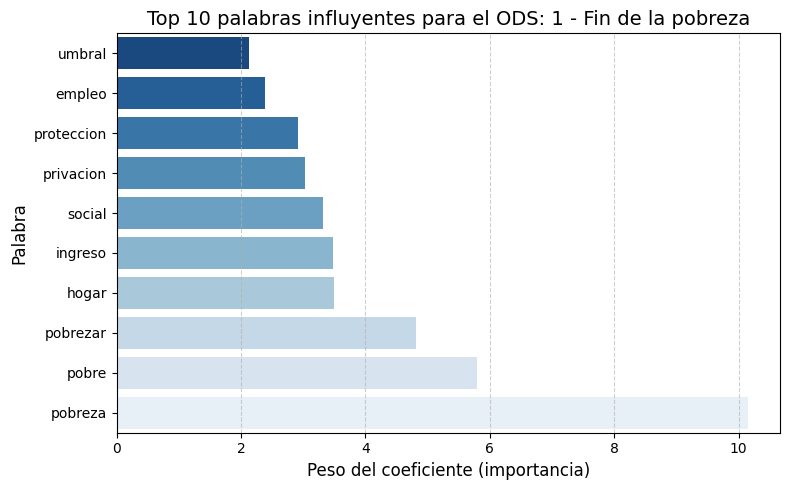

ODS 3 - Top 10 palabras influyentes
salud           -> 8.7513
atencion        -> 5.0945
medico          -> 4.4314
enfermedad      -> 4.1513
sanitario       -> 3.9989
paciente        -> 3.9761
mental          -> 3.2855
mortalidad      -> 2.9985
tratamiento     -> 2.7676
alcohol         -> 2.6917



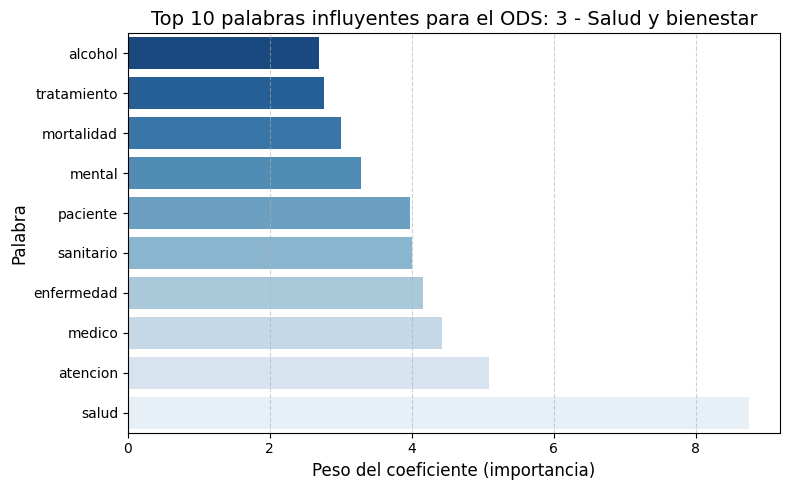

ODS 4 - Top 10 palabras influyentes
educacion       -> 6.9931
escuela         -> 6.3038
educativo       -> 5.2997
docente         -> 4.2667
aprendizaje     -> 4.0155
estudiant       -> 3.9373
escolar         -> 3.7554
alumno          -> 3.7022
profesor        -> 3.3059
estudiante      -> 3.2521



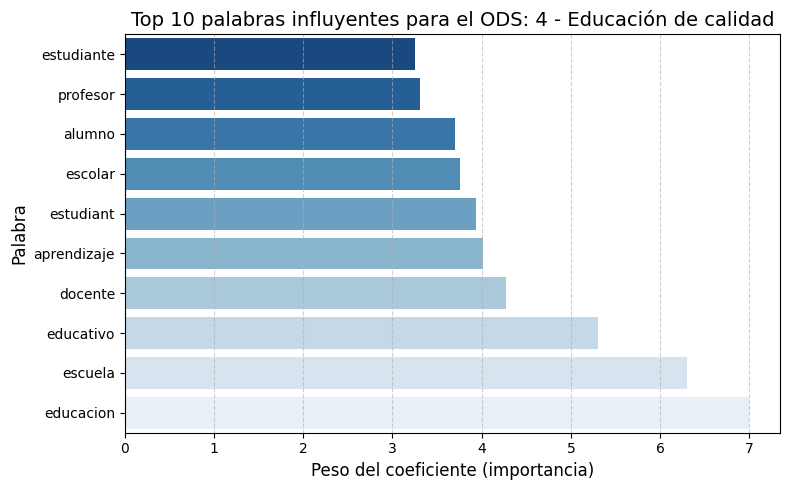

In [ ]:
coefs = lr.coef_
for idx, label in enumerate(lr.classes_):
    # Selección de las 10 palabras más influyentes
    top10 = np.argsort(coefs[idx])[-10:]
    top_features = [vocab[i] for i in top10]
    top_values = coefs[idx][top10]

    # Impresión clara en consola
    print("="*50)
    print(f"ODS {label} - Top 10 palabras influyentes")
    for word, val in zip(top_features[::-1], top_values[::-1]):
        print(f"{word:<15} -> {val:.4f}")
    print("="*50, "\n")

    # Gráfico de barras horizontal
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_values, y=top_features, palette="Blues_r", hue=top_features, dodge=False)

    # Estética
    plt.title(f"Top 10 palabras influyentes para el ODS: {label} - {dic_labels[label]}", fontsize=14)
    plt.xlabel("Peso del coeficiente (importancia)", fontsize=12)
    plt.ylabel("Palabra", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


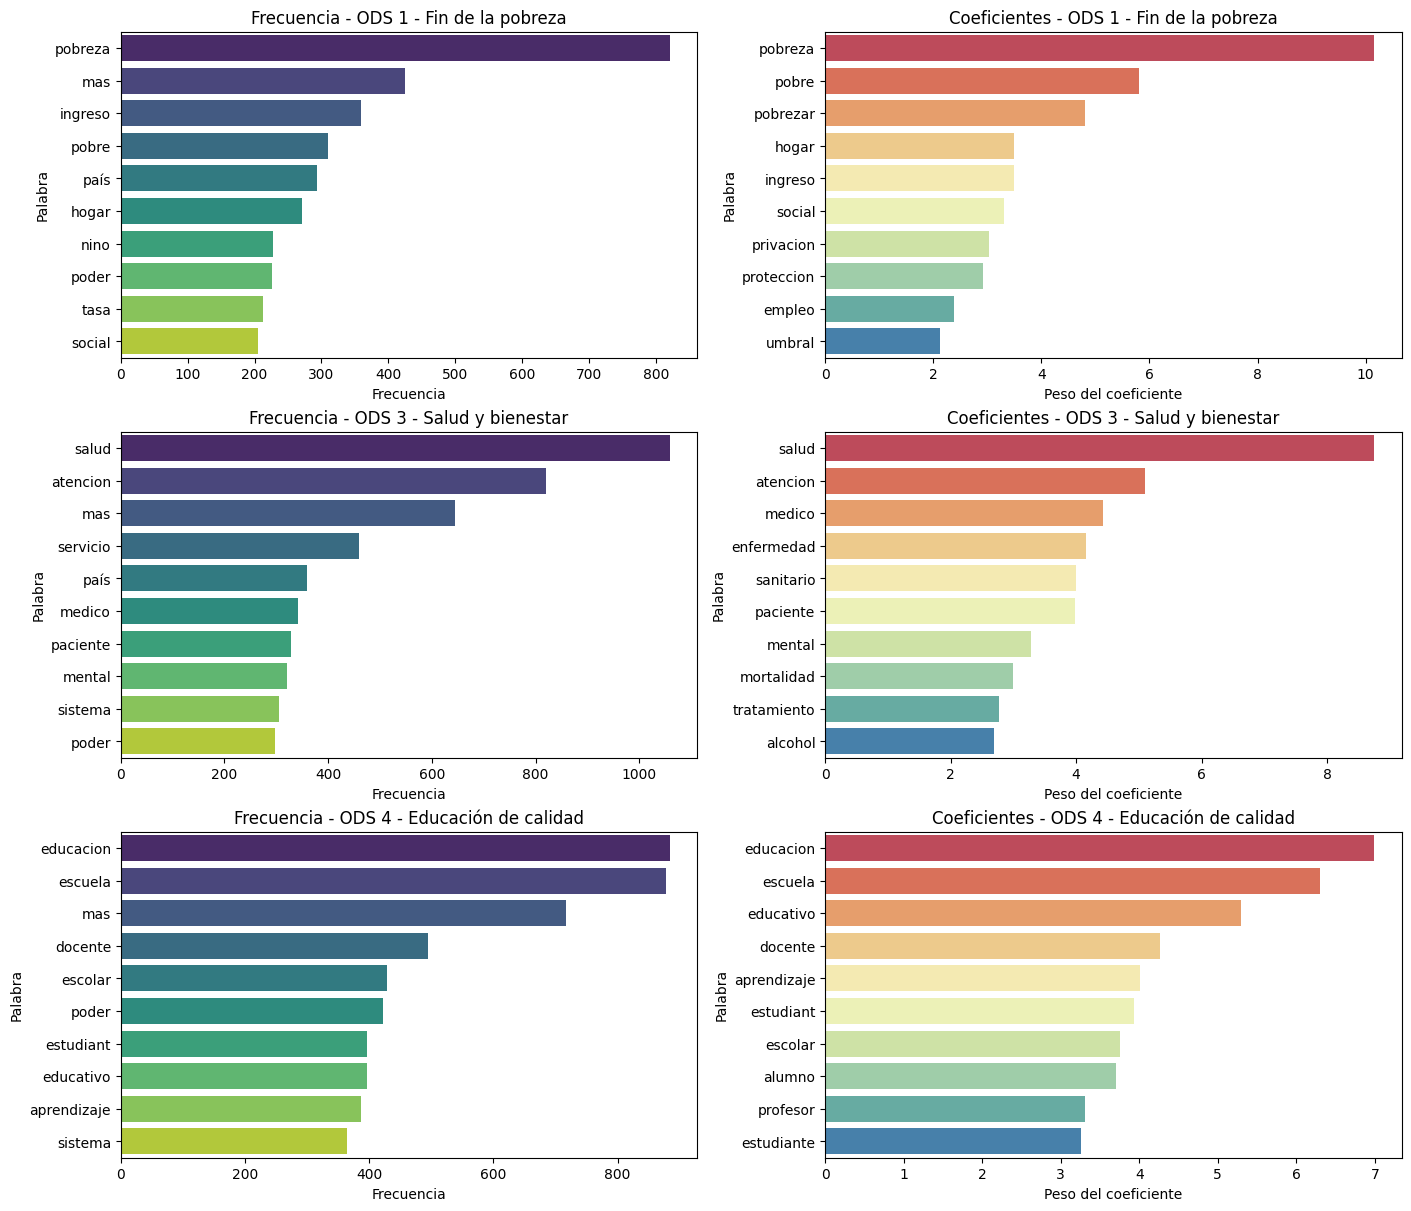

In [ ]:
# Crear figura
fig, axes = plt.subplots(len(dic_labels), 2, figsize=(14, 12), constrained_layout=True)

# Iterar por cada ODS
for row_idx, label in enumerate(dic_labels.keys()):

    # Gráfico de frecuencias
    palabras_, freqs = zip(*top_words[label])
    sns.barplot(
        x=list(freqs),
        y=list(palabras_),
        hue=list(palabras_),
        palette="viridis",
        ax=axes[row_idx, 0]
    )
    axes[row_idx, 0].set_title(f"Frecuencia - ODS {label} - {dic_labels[label]}")
    axes[row_idx, 0].set_xlabel("Frecuencia")
    axes[row_idx, 0].set_ylabel("Palabra")

    # Gráfico de coeficientes
    idx = list(lr.classes_).index(label)
    top10 = np.argsort(coefs[idx])[-10:]
    top_features = [vocab[i] for i in top10]
    top_values = coefs[idx][top10]

    top_features = top_features[::-1]
    top_values = top_values[::-1]


    sns.barplot(
        x=top_values,
        y=top_features,
        hue=top_features,
        palette="Spectral",
        ax=axes[row_idx, 1]
    )
    axes[row_idx, 1].set_title(f"Coeficientes - ODS {label} - {dic_labels[label]}")
    axes[row_idx, 1].set_xlabel("Peso del coeficiente")
    axes[row_idx, 1].set_ylabel("Palabra")

plt.show()


### **Datos Prueba Compratidos**